In [234]:
import numpy as np
from PIL import Image, ImageDraw

In [235]:
def padding(R):
    """make padding

    Args:
        R (sdf): asdf

    Returns:
        _type_: _description_
    """
    X = []
    for _ in range(len(R)):
        for _ in range(len(R[0])):
            Y = [0]
        X.append(Y)
    row_start = np.append(X, 
                          R, 
                          axis=1)
    row_end = np.append(row_start, 
                        X, 
                        axis=1)

    X = []
    for _ in range(len(row_end[0])):
        X.append(0)
    col_start = np.append([X], 
                          row_end, 
                          axis=0)
    col_end = np.append(col_start, 
                        [X], 
                        axis=0)

    return col_end


In [236]:
def filter():
    """sobel operator filter

    Returns:
        h: horizontal kernel
        v: vertical kernel
    """
    h = np.array([[1,0,-1],
                  [2,0,-2],
                  [1,0,-1]])
    
    v = np.array([[1,2,1],
                  [0,0,0],
                  [-1,-2,-1]])
    
    return h,v

In [237]:
def convolution(R):
    """_summary_

    Args:
        R (_type_): _description_

    Returns:
        _type_: _description_
    """
    
    padding_R = padding(R) 
    h, v = filter()
    convol_h = []
    convol_v = []
    
    for i in range(len(padding_R) - 2):
        convol_v1 = []
        convol_h1 = []
        
        for j in range(len(padding_R[0]) - 2):
            convol_h1.append(np.sum(padding_R[i:i+3:, j:j+3:] * h))
            convol_v1.append(np.sum(padding_R[i:i+3:, j:j+3:] * v))
        
        convol_h.append(convol_h1)
        convol_v.append(convol_v1)
    
    convol_h = np.array(convol_h)
    convol_v = np.array(convol_v)

    return convol_v,convol_h

In [238]:
def gaussian_filter():
    """gu

    Returns:
        _type_: _description_
    """
    h = np.array([1,2,1]) / 4
    
    v = np.array([1,2,1]).T / 4
    return h,v


In [239]:
def gaussian_blur(R):
    padding_R = padding(R)
    h,v = gaussian_filter()
    row = []

    for i in range(len(padding_R) - 2):
        cols = []
        for j in range(len(padding_R[0]) - 2):
            col = padding_R[i:i+3:, j:j+3:]@h@v
            cols.append(col)
        row.append(cols)
    row = np.array(row)
    return row

In [240]:
def corner_detector(image,R):
    corner_coordinate = []
    
    pixel = np.array(image)
    a,b = convolution(R)
    x = gaussian_blur(a)
    y = gaussian_blur(b)
    
    dx = x*x
    dxy = x*y
    dy = y*y
    
    dx2 = gaussian_blur(dx)
    dxy2 = gaussian_blur(dxy)
    dy2 = gaussian_blur(dy)
    
    det = dx2 * dy2 - dxy2**2
    tr = (dx2 + dy2)**2
    
    Rs = det-0.06*tr
    threshold = 700000000
    
    for i in range(len(Rs)):
        for j in range(len(Rs[0])):
            if Rs[i][j] > threshold:
                corner_coordinate.append([i, j])

    boundary = 20
                    
    for start in corner_coordinate :
        for end in corner_coordinate[:] :
            if (abs(end[0] - start[0]) < boundary and 
                abs(end[1] - start[1]) < boundary and 
                start != end) :
                corner_coordinate.remove(end)
                
    return pixel, corner_coordinate

In [241]:
def draw_corner(image, coordinate) :
    re_image = Image.fromarray(image)
    draw = ImageDraw.Draw(re_image)
    for coor in coordinate :
        draw.ellipse((coor[1] - 5, coor[0] - 5, 
                    coor[1] + 5, coor[0] + 5),
                    outline='red')
    return re_image

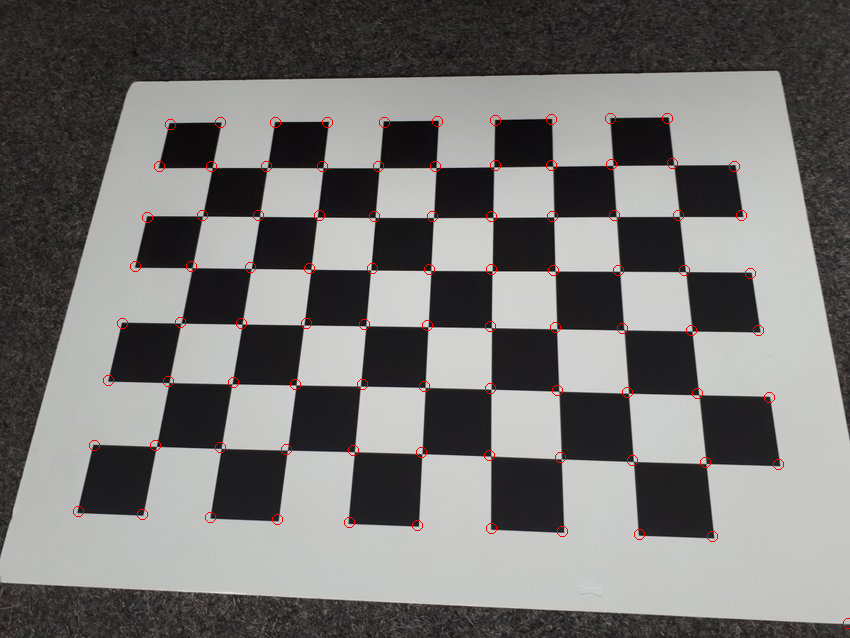

corner : 87


In [242]:
image = Image.open('./data/harriscorner.png')
image_pixel = np.array(image)
R = []
for i in range(len(image_pixel)):
    R2 = []
    for j in range(len(image_pixel[0])):
            R2.append(image_pixel[i][j][0])
    R.append(R2)
R = np.array(R)

result_image, result_coordinate = corner_detector(image,R)

result = draw_corner(result_image, result_coordinate)
result.show()

print(f'corner : {len(result_coordinate)}')